In [15]:
import rasterio as rio
import rasterio

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

In [4]:
new=rio.open('/mnt/f/random/new.tif')
new

<open DatasetReader name='/mnt/f/random/new.tif' mode='r'>

In [16]:
with rasterio.open('/mnt/f/random/new.tif') as ds:
    print('该栅格数据的基本数据集信息（这些信息都是以数据集属性的形式表示的）：')
    print(f'数据格式：{ds.driver}')
    print(f'波段数目：{ds.count}')
    print(f'影像宽度：{ds.width}')
    print(f'影像高度：{ds.height}')
    print(f'地理范围：{ds.bounds}')
    print(f'反射变换参数（六参数模型）：\n {ds.transform}')
    print(f'投影定义：{ds.crs}')
    # 获取第一个波段数据，跟GDAL一样索引从1开始
    # 直接获得numpy.ndarray类型的二维数组表示，如果read()函数不加参数，则得到所有波段（第一个维度是波段）
    band1 = ds.read(1)
    print(f'第一波段的最大值：{band1.max()}')
    print(f'第一波段的最小值：{band1.min()}')
    print(f'第一波段的平均值：{band1.mean()}')
    # 根据地理坐标得到行列号
    x, y = (ds.bounds.left + 300, ds.bounds.top - 300)  # 距离左上角东300米，南300米的投影坐标
    row, col = ds.index(x, y)  # 对应的行列号
    print(f'(投影坐标{x}, {y})对应的行列号是({row}, {col})')
    # 根据行列号得到地理坐标
    x, y = ds.xy(row, col)  # 中心点的坐标
    print(f'行列号({row}, {col})对应的中心投影坐标是({x}, {y})')
    # 那么如何得到对应点左上角的信息
    x, y = (row, col) * ds.transform
    print(f'行列号({row}, {col})对应的左上角投影坐标是({x}, {y})')

该栅格数据的基本数据集信息（这些信息都是以数据集属性的形式表示的）：
数据格式：GTiff
波段数目：1
影像宽度：5767
影像高度：3630
地理范围：BoundingBox(left=-2355600.0, bottom=268400.0, right=2258000.0, top=3172400.0)
反射变换参数（六参数模型）：
 | 800.00, 0.00,-2355600.00|
| 0.00,-800.00, 3172400.00|
| 0.00, 0.00, 1.00|
投影定义：PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
第一波段的最大值：8
第一波段的最小值：0
第一波段的平均值：3.7707137742479895
(投影坐标-2355300.0, 3172100.0)对应的行列号是(0, 0)
行列号(0, 0)对应的中心投影坐标是(-2355200.0, 3172000.0)
行列号(0, 0)对应的左上角投影坐标是(-2355600.0, 3172400.0)


<ipython-input-16-ca60ba4e5158>:24: DeprecationWarning: Right multiplication will be prohibited in version 3.0
  x, y = (row, col) * ds.transform


In [25]:
band1 = new.read(1)
band1.

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [20]:

from scipy import stats


(array([[3.625e+03, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         4.000e+00],
        [3.622e+03, 0.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         6.000e+00],
        [3.613e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         1.200e+01],
        ...,
        [3.629e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [3.628e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [3.628e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         2.000e+00]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 5767 BarContainer objects>)

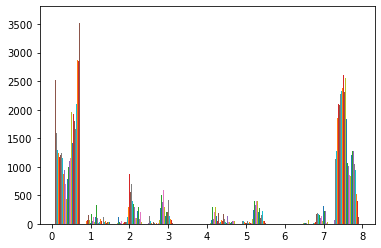

In [26]:
plt.hist(band1)

In [24]:
stats.mode(band1.reshape(5767*3630,1))

ModeResult(mode=array([[0]], dtype=uint8), count=array([[8808369]]))

In [18]:
counts = np.bincount(band1)
#返回众数
np.argmax(counts)

ValueError: object too deep for desired array